In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\drjus\AppData\Local\Temp\ipykernel_29580\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

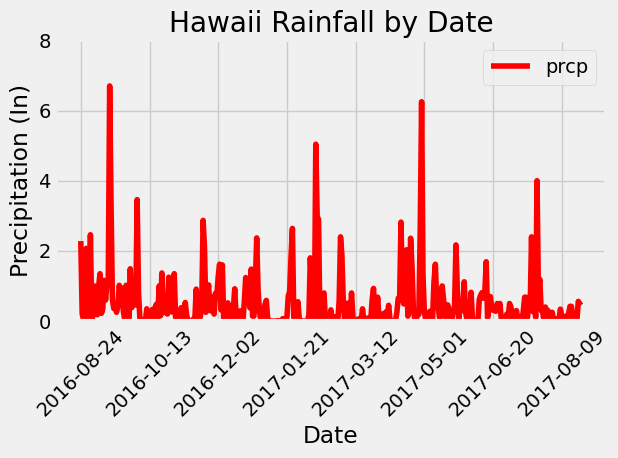

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
sel = [measurement.date, func.max(measurement.prcp)]

    filter(measurement.date >= "2016-08-24").\
    group_by(measurement.date).\
    order_by(measurement.date).all()
# Calculate the date one year from the last date in data set.
average_rain_fall = session.query(*sel).\

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date

 order_by(measurement.date).all()
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(average_rain_fall, columns=["date", "prcp"])
df.set_index("date", inplace=True)
df.plot(color = "red", ylim = (0,8), rot = 45)
plt.title("Hawaii Rainfall by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation (In)")
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
station_list = session.query(station.name).all()

station_count = session.query(station.station).count()

print(f"\n\nThere are {station_count} stations in this dataset.")



There are 9 stations in this dataset.


In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_df_info = [station.station, station.name, station.latitude, station.longitude, station.elevation]
station_df_query = session.query(*station_df_info)
station_df = pd.DataFrame(station_df_query)

measurement_df_info = [measurement.station, measurement.date, measurement.prcp, measurement.tobs]
measurement_df_query = session.query(*measurement_df_info)
measurement_df = pd.DataFrame(measurement_df_query)

merge_data = pd.merge(station_df, measurement_df, on="station")
combined_data = merge_data["station"].value_counts()

combined_data

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64

In [29]:
# Usstation_df_info = [station.station, station.name, station.latitude, station.longitude, station.elevation]
max_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

min_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

avg_temp = round(session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0],2)

print(f"Maximum temperature for station USC00519281 is : {max_temp} degrees\n")

print(f"Minimum temperature for station USC00519281 is : {min_temp} degrees\n")

print(f"Average temperature for station USC00519281 is : {avg_temp} degrees")

Maximum temperature for station USC00519281 is : 85.0 degrees

Minimum temperature for station USC00519281 is : 54.0 degrees

Average temperature for station USC00519281 is : 71.66 degrees


C:\Users\drjus\AppData\Local\Temp\ipykernel_29580\221792410.py:7: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist, bin_edges = scipy.histogram(temp_data, bins = 12)


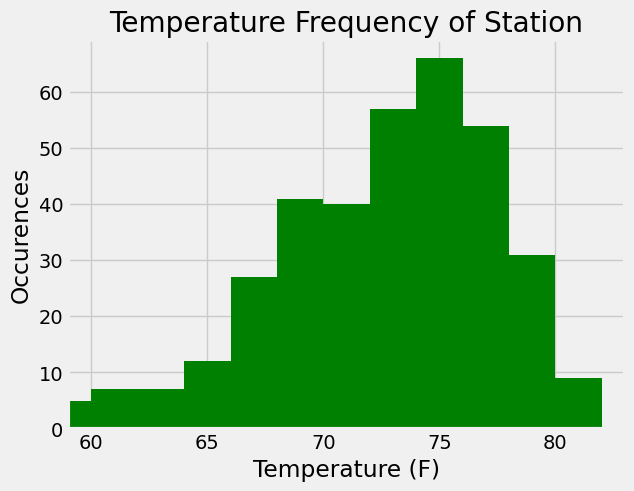

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).\
    filter(measurement.date >= "2016-08-19").\
    filter(measurement.station == "USC00519281").all()

hist, bin_edges = scipy.histogram(temp_data, bins = 12)
plt.bar(bin_edges[:-1], hist, width = 2,color="green")
plt.title("Temperature Frequency of Station")
plt.xlabel("Temperature (F)")
plt.ylabel("Occurences")
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.show()

# Close Session

In [34]:
# Close Session
session.close()